In [430]:
    def z_link_func(x, data=data):
        return 1 / (1 + np.exp(-(x.values.ravel())))

In [485]:
import argparse
import os
from kabuki.analyze import gelman_rubin
import pandas
import hddm
import numpy as np

path = '/home/gdholla1/projects/bias/data/hddm_fits'

def get_model(model):
    df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')

    # Prepare data
    data = df[['cue_validity', 'rt', 'correct', 'difficulty', 'subj_idx']]
    data['response'] = data['correct']
    data['rt'] = data['rt'] / 1000.
    data = data[(data.rt > .2) & (data.rt < 1.5)]
    data = data[~data.rt.isnull()]
    data['cue_coding'] = data.cue_validity.map({'valid':1, 'neutral':0, 'invalid':-1})

    def z_link_func(x, data=data):
        return 1 / (1 + np.exp(-(x.values.ravel())))

    regs, free_pars = model.split('_')

    if regs == 'drift':
        z_reg = {'model': 'z ~ 0', 'link_func': z_link_func}
        v_reg = {'model': 'v ~ 1 + C(difficulty) + cue_coding', 'link_func': lambda x: x}
    elif regs == 'startpoint':
        z_reg = {'model': 'z ~ 0 + cue_coding', 'link_func': z_link_func}
        v_reg = {'model': 'v ~ 1 + C(difficulty)', 'link_func': lambda x: x}
    elif regs == 'both':
        z_reg = {'model': 'z ~ 0 + cue_coding', 'link_func': z_link_func}
        v_reg = {'model': 'v ~ 1 + C(difficulty) + cue_coding', 'link_func': lambda x: x}

    reg_descr = [z_reg, v_reg]

    if free_pars == 'sv':
        hddm_model = hddm.HDDMRegressor(data, reg_descr, include=('sv'), bias=True, group_only_regressors=False, group_only_nodes=['sv'])
    elif free_pars == 'sz':
        hddm_model = hddm.HDDMRegressor(data, reg_descr, include=('sz'), bias=True, group_only_regressors=False, group_only_nodes=['sz'])
    elif free_pars == 'svsz':
        hddm_model = hddm.HDDMRegressor(data, reg_descr, include=('sv', 'sz'), bias=True, group_only_regressors=False, group_only_nodes=['sv', 'sz'])
    elif free_pars == 'all':
        hddm_model = hddm.HDDMRegressor(data, reg_descr, include=('sv', 'sz', 'st'), bias=True, group_only_regressors=False, group_only_nodes=['sv', 'sz', 'st'])
    elif free_pars == 'none':
        hddm_model = hddm.HDDMRegressor(data, reg_descr, bias=True, group_only_regressors=False)        
    
    
    # NOW FIND, LOAD, AND CONCAT TRACES
    reg = re.compile('.*/traces_{model}_[0-9]+.pkl'.format(**locals()))
    fns = [fn for fn in glob.glob('/home/gdholla1/projects/bias/data/hddm_fits/traces_{model}_*.pkl'.format(**locals())) if reg.match(fn)]

    hddm_model.load_db(fns[0], db='pickle')

    for fn in fns[1:]:
        traces = pkl.load(open(fn))    
        for node in hddm_model.get_stochastics().node:
            node.trace._trace[0] = np.concatenate([traces[str(node)][0], node.trace[:]])        


    return hddm_model

In [486]:
import glob
import re

import pickle as pkl

In [490]:
models = ['drift_all', 'drift_sv', 'drift_sz', 'drift_svsz',
          'startpoint_all', 'startpoint_sv', 'startpoint_sz', 'startpoint_svsz',
          'both_all', 'both_sv', 'both_sz', 'both_svsz',
          'drift_none', 'startpoint_none', 'both_none']

In [491]:
r= []

for model in models:
    hddm_model = get_model(model)
    
    r.append({'model':model,
              'dic':hddm_model.dic})
    
pandas.DataFrame(r)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Adding these covariates:
[]
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']
Adding these covariates:
[]
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']
Adding these covariates:
[]
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']
Adding these covariates:
[]
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']
Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]']
Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]']
Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]']
Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]']
Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v

dic            model
0   5501.816389        drift_all
1   8895.169402         drift_sv
2   8967.165207         drift_sz
3   8893.578319       drift_svsz
4   5462.588708   startpoint_all
5   9029.506058    startpoint_sv
6   9097.887719    startpoint_sz
7   9027.659846  startpoint_svsz
8   5437.414338         both_all
9   8824.523659          both_sv
10  8904.451704          both_sz
11  8823.082472        both_svsz
12  8966.301156       drift_none
13  9098.439767  startpoint_none
14  8903.866437        both_none

In [493]:
r = pandas.DataFrame(r).sort('dic')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [494]:
r['bias manipulation'] = r.model.apply(lambda x: x.split('_')[0])
r['across-trial variability'] = r.model.apply(lambda x: x.split('_')[1])

np.round(r.pivot_table(index='bias manipulation', columns='across-trial variability').astype(int)).ix[['drift', 'startpoint', 'both']][[('dic', 'none'), ('dic', 'sv'), ('dic', 'sz'), ('dic', 'svsz'), ('dic', 'all')]]

dic                        
across-trial variability  none    sv    sz  svsz   all
bias manipulation                                     
drift                     8966  8895  8967  8893  5501
startpoint                9098  9029  9097  9027  5462
both                      8903  8824  8904  8823  5437

In [496]:
hddm_model = get_model('both_all')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']


In [499]:
traces = hddm_model.get_traces()

In [501]:
traces.columns.tolist()

['a',
 'a_std',
 'a_subj.1',
 'a_subj.10',
 'a_subj.11',
 'a_subj.12',
 'a_subj.13',
 'a_subj.14',
 'a_subj.15',
 'a_subj.16',
 'a_subj.17',
 'a_subj.18',
 'a_subj.19',
 'a_subj.2',
 'a_subj.3',
 'a_subj.4',
 'a_subj.5',
 'a_subj.6',
 'a_subj.7',
 'a_subj.8',
 'a_subj.9',
 'st',
 'sv',
 'sz',
 't',
 't_std',
 't_subj.1',
 't_subj.10',
 't_subj.11',
 't_subj.12',
 't_subj.13',
 't_subj.14',
 't_subj.15',
 't_subj.16',
 't_subj.17',
 't_subj.18',
 't_subj.19',
 't_subj.2',
 't_subj.3',
 't_subj.4',
 't_subj.5',
 't_subj.6',
 't_subj.7',
 't_subj.8',
 't_subj.9',
 'v_C(difficulty)[T.hard]',
 'v_C(difficulty)[T.hard]_std',
 'v_C(difficulty)[T.hard]_subj.1',
 'v_C(difficulty)[T.hard]_subj.10',
 'v_C(difficulty)[T.hard]_subj.11',
 'v_C(difficulty)[T.hard]_subj.12',
 'v_C(difficulty)[T.hard]_subj.13',
 'v_C(difficulty)[T.hard]_subj.14',
 'v_C(difficulty)[T.hard]_subj.15',
 'v_C(difficulty)[T.hard]_subj.16',
 'v_C(difficulty)[T.hard]_subj.17',
 'v_C(difficulty)[T.hard]_subj.18',
 'v_C(difficul

In [506]:
df = []

for i in np.arange(1, 20):
    df.append({'subj_idx':i,
                 'v_cue_coding':traces['v_cue_coding_subj.%d' % i].mean(),
                 'z_cue_coding':traces['z_cue_coding_subj.%d' % i].mean(),
                 'v_difficulty':traces['v_C(difficulty)[T.hard]_subj.%d' % i].mean()})
    
df = pandas.DataFrame(df)

In [523]:
traces['v (hard)'] = traces['v_Intercept'] + traces['v_C(difficulty)[T.hard]']

traces['z (congruent)'] = z_link_func(traces['z_cue_coding']) * traces['a']
traces['z (incongruent)'] = z_link_func(-traces['z_cue_coding']) * traces['a']

In [525]:
params = ['a', 'v_Intercept', 'v (hard)', 't', 'z (congruent)', 'z (incongruent)', 'sv', 'sz', 'st']

np.round(traces[params].describe().T[['mean', '25%', '50%', '75%']], 3)

mean    25%    50%    75%
a                1.019  0.986  1.017  1.049
v_Intercept      1.171  1.026  1.166  1.315
v (hard)         0.560  0.397  0.556  0.723
t                0.611  0.593  0.611  0.629
z (congruent)    0.581  0.553  0.579  0.607
z (incongruent)  0.438  0.414  0.437  0.461
sv               1.025  0.945  1.026  1.106
sz               0.082  0.041  0.079  0.118
st               0.503  0.496  0.503  0.510

In [509]:
hddm_model.print_stats(print_hidden=False)

                                       mean         std        2.5q        25q         50q        75q      97.5q       mc err
a                                   1.01865   0.0495679    0.926724   0.985846     1.01659    1.04916     1.1215   0.00115589
a_std                                0.2035   0.0408872    0.142512   0.174668    0.197177   0.225291   0.301043  0.000684438
a_subj.1                           0.808995   0.0362824    0.742139   0.784035      0.8078   0.832399    0.88296   0.00113002
a_subj.2                            1.29686   0.0419577     1.21677    1.26799     1.29618    1.32434     1.3817   0.00124528
a_subj.3                           0.800144   0.0329103    0.738009   0.777542    0.799285   0.822255   0.866171    0.0010853
a_subj.4                            1.07861   0.0383059     1.00447    1.05301     1.07773    1.10362    1.15689   0.00127851
a_subj.5                           0.986987   0.0454952     0.90267   0.955512    0.985413      1.017    1.08017   0.0

In [497]:
pandas.read_pickle('/home/gdholla1/projects/bias/data/derivatives/behavior/hddm/bias_shifts.pkl')

subj_idx  v_cue_coding  v_difficulty  z_cue_coding
0          1     -0.148440     -0.786935     -0.004807
1          2      0.008400     -0.418274      0.209395
2          3     -0.189604     -0.532316      0.304420
3          4      1.302674     -0.050203      0.328166
4          5      0.195892     -0.787838     -0.012188
5          6      0.747321     -0.862304      0.260270
6          7     -0.338653     -0.709117      0.247486
7          8      0.299781     -0.304853      0.301060
8          9     -0.316918     -0.497399      0.469534
9         10      0.010569     -0.855930      0.163072
10        11      0.115810     -0.074737     -0.344235
11        12      0.217570     -1.132546      0.181377
12        13     -0.198871     -0.267430      0.107004
13        14     -0.061214     -0.901557      0.509266
14        15     -0.084307     -1.664461     -0.157732
15        16      0.311526     -0.289038      1.456135
16        17      0.638084     -0.464190      0.159792
17        18     -0.219059     -0.301884      0.810332
18        19      0.665095     -0.719378      0.407290

In [422]:
# df.to_pickle('/home/gdholla1/projects/bias/data/derivatives/behavior/hddm/bias_shifts.pkl')

# Posterior predictive checks

In [646]:
hddm_model = get_model('both_all')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Adding these covariates:
['z_cue_coding']
Adding these covariates:
['v_Intercept', 'v_C(difficulty)[T.hard]', 'v_cue_coding']


In [648]:
pcc_data = pandas.read_pickle('1ppc_both_all.pkl')

In [651]:
# Make a column that make clear which nth sample from the posterior was used
ppc_data['sample'] = ppc_data.index.get_level_values(1)


# Merge with real data, so we know the corresponding trial conditions
ppc_data_merged = hddm_model.data[['cue_validity', 'difficulty', 'subj_idx']].merge(ppc_data.set_index(ppc_data.index.get_level_values(2)), left_index=True, right_index=True)

In [652]:
def get_quantile_dataframe(d, q=(0.1, 0.3, 0.5, 0.7, 0.9)):
    q_lb, q_ub, prop_ub = hddm.utils.data_quantiles(d)
    
    df_ub = pandas.DataFrame({'q_rt':q_ub, 'prop':np.array(q)*prop_ub, 'q':q})
    df_ub['bound'] = 'ub'
    
    df_lb = pandas.DataFrame({'q_rt':q_lb, 'prop':np.array(q)*(1-prop_ub), 'q':q})    
    df_lb['bound'] = 'lb'
    
    return pandas.concat((df_ub, df_lb))


In [653]:
sns.set_context('paper')

In [654]:
data_quantiles = hddm_model.data.groupby(['subj_idx', 'cue_validity', 'difficulty']).apply(get_quantile_dataframe)

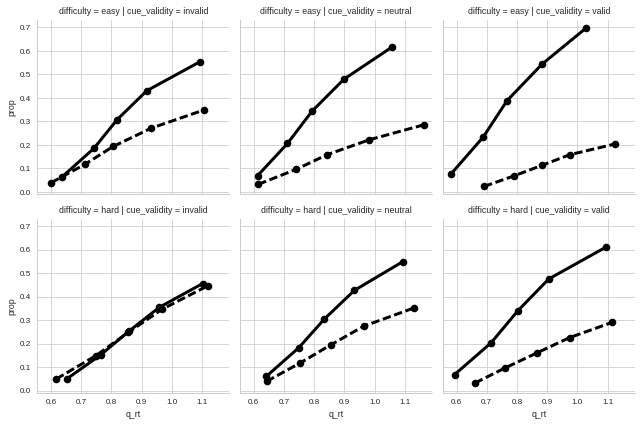

In [655]:
# Make quantiles per subject
data_quantiles = hddm_model.data.groupby(['subj_idx', 'cue_validity', 'difficulty']).apply(get_quantile_dataframe)

# Mean quantiles over subjects
data_quantiles = data_quantiles.reset_index().groupby(['cue_validity', 'difficulty', 'q', 'bound'], as_index=False).mean()

# Make a FacetGrid to plot the quantiles over conditions
fac = sns.FacetGrid(data_quantiles, col='cue_validity', row='difficulty', hue='bound', hue_kws={'ls':['--', '-']})
fac.map(plt.plot, 'q_rt', 'prop', lw=3, color='k', marker='o', markeredgewidth=2)

In [657]:
model_quantiles_subj = ppc_data_merged.groupby(['sample', 'subj_idx', 'cue_validity', 'difficulty']).apply(get_quantile_dataframe)
model_quantiles = model_quantiles_subj.reset_index().groupby(['sample', 'cue_validity', 'difficulty', 'q', 'bound'], as_index=False).mean()

In [659]:
data_quantiles['prop_bound'] = model_quantiles['prop'] / model_quantiles['q']
model_quantiles['prop_bound'] = model_quantiles['prop'] / model_quantiles['q']

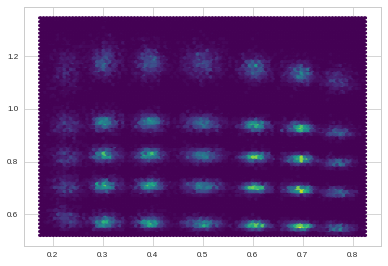

In [660]:
plt.hexbin(model_quantiles['prop_bound'], model_quantiles['q_rt'], cmap=plt.cm.viridis)

In [661]:
np.sort(np.array([3,4,1]))

array([1, 3, 4])

In [662]:
def plot_order(x, y, **kwargs):
    y = y.values[np.argsort(x.values)]
    x = np.sort(x.values)
    plt.plot(x, y, **kwargs)
    
    plt.scatter(x[:2], y[:2], marker='x', s=40,  color='white', edgecolor='white', linewidth='2', alpha=.7)
    plt.scatter(x[2:], y[2:], marker='o', s=40,  color='white', edgecolor='white', linewidth='2', alpha=.7)


In [663]:
sns.set_context('paper')

In [664]:
data_quantiles['cue congruency'] = data_quantiles['cue_validity'].map({'invalid':'incongruent', 'neutral':'neutral', 'valid':'congruent'})
model_quantiles['cue congruency'] = model_quantiles['cue_validity'].map({'invalid':'incongruent', 'neutral':'neutral', 'valid':'congruent'})

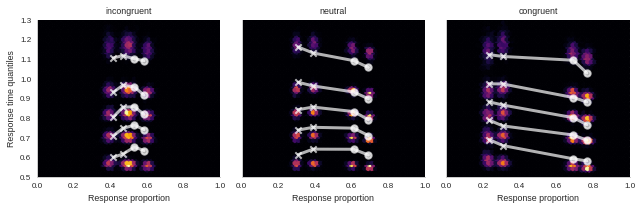

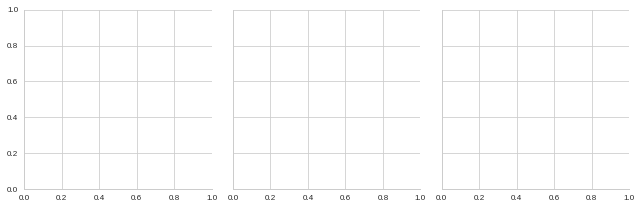

In [665]:
def hexbin(x, y, color, **kwargs):
    plt.hexbin(x, y, **kwargs)

fac_model = sns.FacetGrid(model_quantiles, col='cue congruency')
fac_model.map(hexbin, 'prop_bound', 'q_rt', gridsize=50, cmap=plt.cm.inferno, extent=[0, 1, 0.5, 1.3])

fac = sns.FacetGrid(data_quantiles, col='cue congruency', hue='q')
fac.fig = fac_model.fig
fac.axes = fac_model.axes
# fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', marker='o', markeredgewidth=2, alpha=.7)
fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', markeredgewidth=2, alpha=.7)
fac.set_xlabels('Response proportion')
fac.set_ylabels('Response time quantiles')
fac.set_titles('{col_name}')
fac.fig.savefig('/home/gdholla1/projects/bias/reports/hddm_fit_both.pdf')
# fac.fig.set_size_inches(30, 6)

# Subject wise

In [693]:
data_quantiles_subj = hddm_model.data.groupby(['subj_idx', 'cue_validity', 'difficulty']).apply(get_quantile_dataframe).reset_index()

data_quantiles_subj['cue congruency'] = data_quantiles_subj['cue_validity'].map({'invalid':'incongruent', 'neutral':'neutral', 'valid':'congruent'})

data_quantiles_subj['prop_bound'] = data_quantiles_subj['prop'] / data_quantiles_subj['q']

In [694]:
model_quantiles_subj['prop_bound'] = model_quantiles_subj['prop'] / model_quantiles_subj['q']

tmp = model_quantiles_subj.reset_index()
tmp['cue congruency'] = tmp.reset_index()['cue_validity'].map({'invalid':'incongruent', 'neutral':'neutral', 'valid':'congruent'})

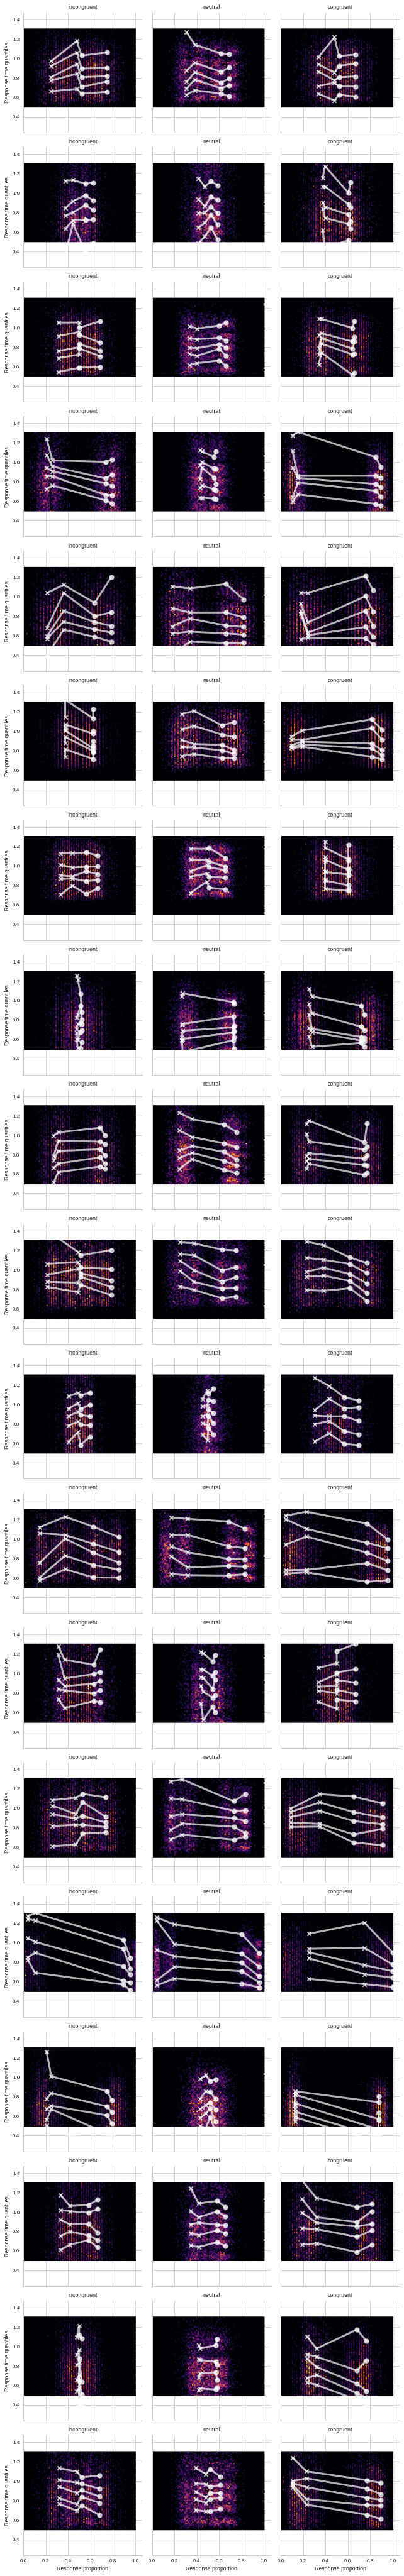

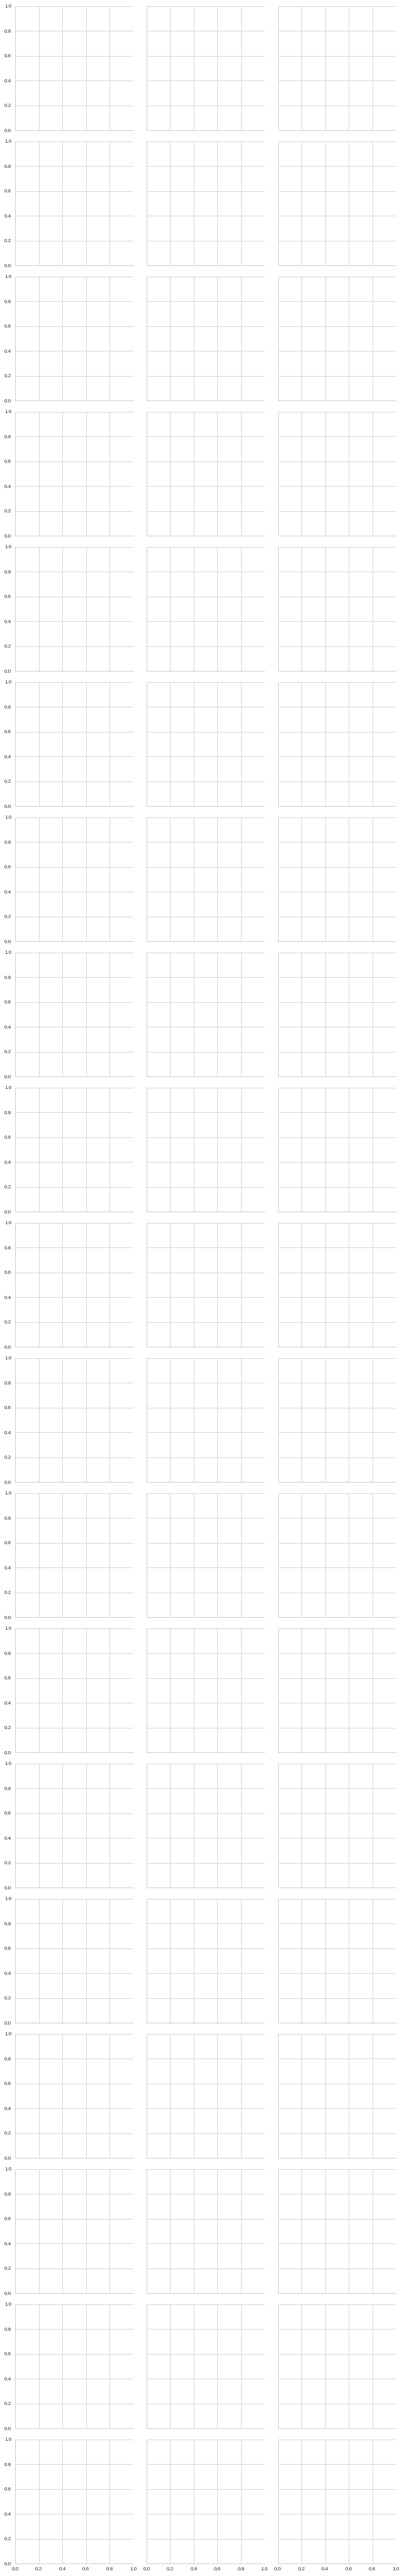

In [695]:
fac_model = sns.FacetGrid(tmp.iloc[:], col='cue congruency', row='subj_idx')
fac_model.map(hexbin, 'prop_bound', 'q_rt', gridsize=100, cmap=plt.cm.inferno, extent=[0, 1, 0.5, 1.3])

fac = sns.FacetGrid(data_quantiles_subj, col='cue congruency', row='subj_idx', hue='q')
fac.fig = fac_model.fig
fac.axes = fac_model.axes
# fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', marker='o', markeredgewidth=2, alpha=.7)
fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', markeredgewidth=2, alpha=.7)
fac.set_xlabels('Response proportion')
fac.set_ylabels('Response time quantiles')
fac.set_titles('{col_name}')
fac.fig.savefig('/home/gdholla1/projects/bias/reports/hddm_fit_both_subjects.pdf')
# fac.fig.set_size_inches(30, 6)

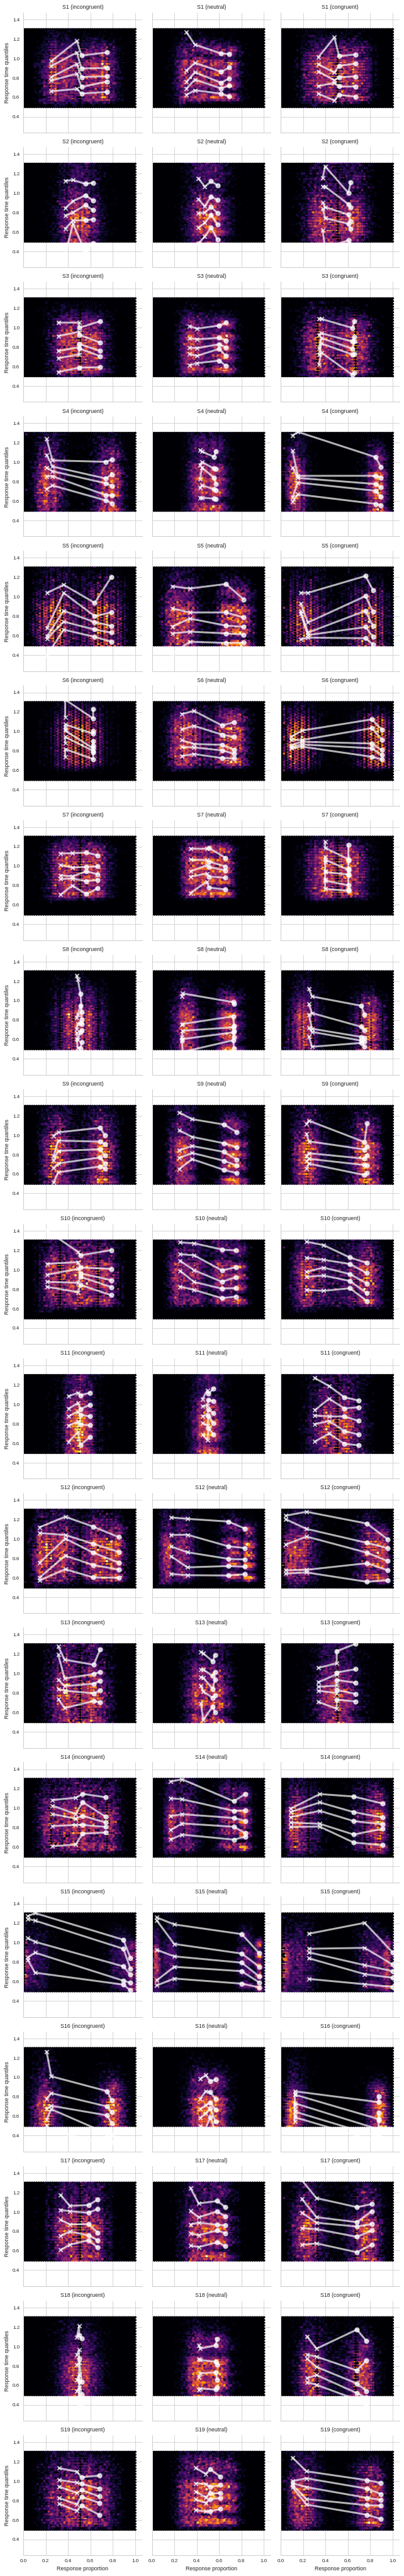

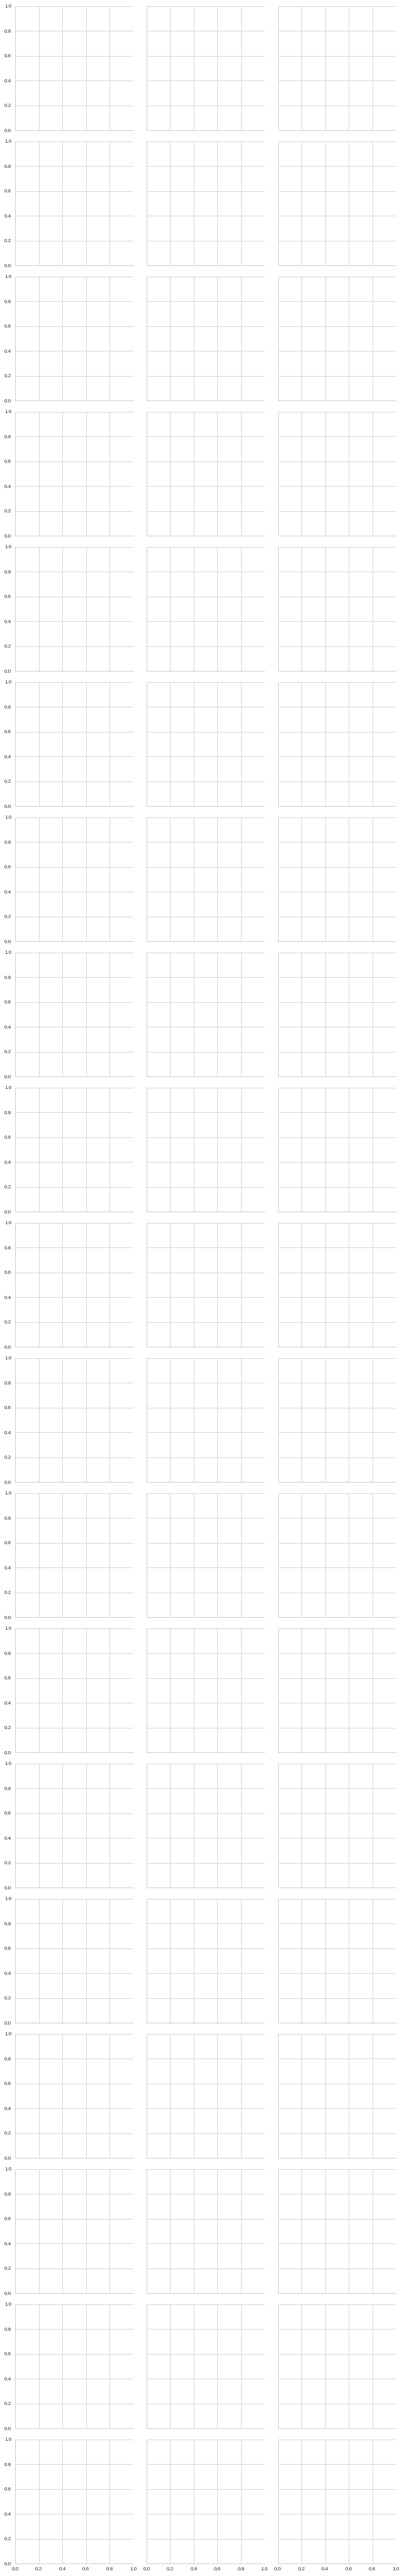

In [700]:
fac_model = sns.FacetGrid(tmp.iloc[:], col='cue congruency', row='subj_idx')
fac_model.map(hexbin, 'prop_bound', 'q_rt', gridsize=50, cmap=plt.cm.inferno, extent=[0, 1, 0.5, 1.3])

fac = sns.FacetGrid(data_quantiles_subj, col='cue congruency', row='subj_idx', hue='q')
fac.fig = fac_model.fig
fac.axes = fac_model.axes
# fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', marker='o', markeredgewidth=2, alpha=.7)
fac.map(plot_order, 'prop_bound', 'q_rt', lw=3, color='w', markeredgewidth=2, alpha=.7)
fac.set_xlabels('Response proportion')
fac.set_ylabels('Response time quantiles')
fac.set_titles('S{row_name} ({col_name})')
fac.fig.savefig('/home/gdholla1/projects/bias/reports/hddm_fit_both_subjects_v2.pdf')
# fac.fig.set_size_inches(30, 6)

In [709]:
def percentile5(x):
    return np.percentile(x, 5)

def percentile95(x):
    return np.percentile(x, 95)

In [761]:
tmp1 = data_quantiles_subj.groupby(['subj_idx', 'cue_validity', 'difficulty', 'q', 'bound']).q_rt.agg(np.mean).reset_index()

In [763]:
tmp2 = tmp.groupby(['subj_idx', 'cue_validity', 'difficulty', 'q', 'bound']).q_rt.agg([percentile5, np.mean, percentile95]).reset_index()

In [764]:
tmp3 = tmp1.merge(tmp2, on=['subj_idx', 'cue_validity', 'difficulty', 'q', 'bound'])

In [765]:
tmp3.head()

subj_idx cue_validity difficulty    q bound     q_rt  percentile5  \
0         1      invalid       easy  0.1    lb  0.66154     0.531327   
1         1      invalid       easy  0.1    ub  0.65470     0.548927   
2         1      invalid       easy  0.3    lb  0.77216     0.627227   
3         1      invalid       easy  0.3    ub  0.76190     0.659364   
4         1      invalid       easy  0.5    lb  0.80750     0.735603   

       mean  percentile95  
0  0.614552      0.716769  
1  0.604112      0.676415  
2  0.736240      0.857515  
3  0.729105      0.799850  
4  0.844299      0.950252

In [766]:
def plot_dataframe(**kwargs):
    
    d = kwargs['data']
    
    plt.plot([0.4, 1.2], [0.4, 1.2], c='k', ls='--')
    
    plt.scatter(d['q_rt'], d['mean'], **kwargs)
    
    for i, row in d.iterrows():
#         print [row['mean']-row['percentile5'], row['percentile95']-row['mean']]
        plt.errorbar([row['q_rt']], [row['mean']], yerr=[[row['mean']-row['percentile5']], [row['percentile95']-row['mean']]], **kwargs)
    

In [781]:
tmp3['condition'] = tmp3.apply(lambda row: 'q = %.1f (%s)' % (row.q, 'correct' if row.bound == 'ub' else 'error'), 1)

In [783]:
tmp3['condition'].unique()

array(['q = 0.1 (error)', 'q = 0.1 (correct)', 'q = 0.3 (error)',
       'q = 0.3 (correct)', 'q = 0.5 (error)', 'q = 0.5 (correct)',
       'q = 0.7 (error)', 'q = 0.7 (correct)', 'q = 0.9 (error)',
       'q = 0.9 (correct)'], dtype=object)

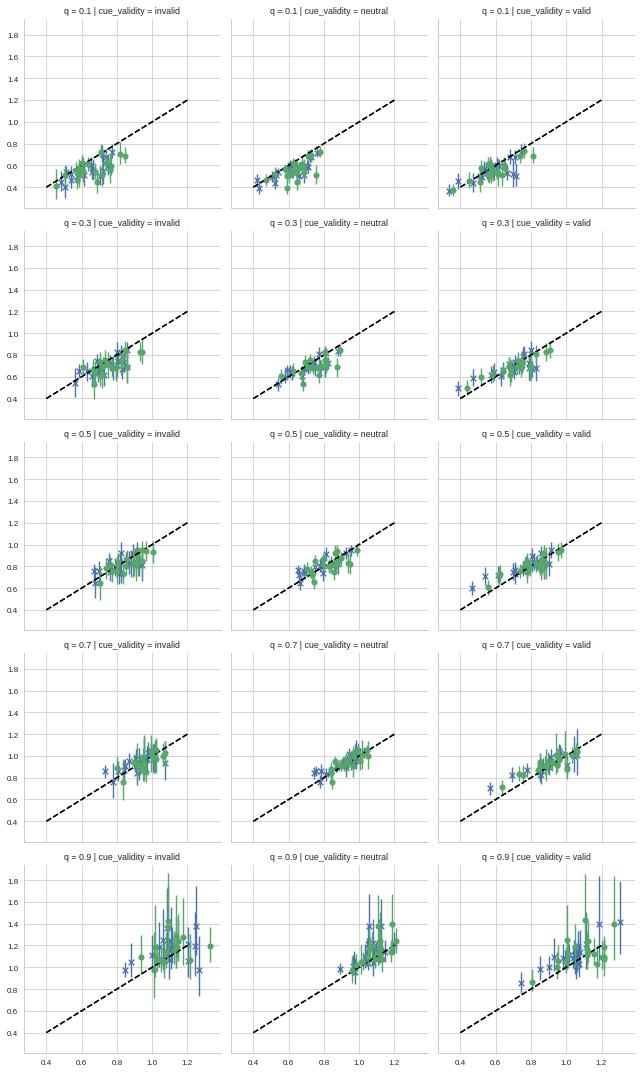

In [777]:
fac = sns.FacetGrid(tmp3[tmp3.bound == 'ub'], col='cue_validity', row='q', hue='condition', hue_kws={'marker':['o', 'o', 'x', 'x']})


# fac.map(plt.scatter, 'q_rt', 'mean')
fac.map_dataframe(plot_dataframe)

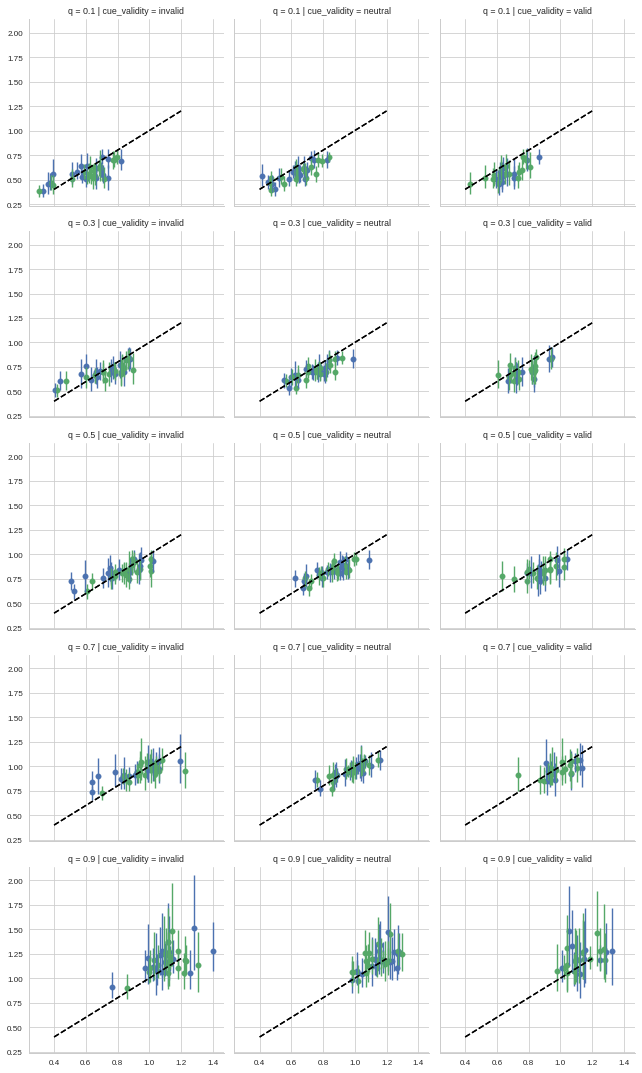

In [775]:
fac = sns.FacetGrid(tmp3[tmp3.bound == 'lb'], col='cue_validity', row='q', hue='difficulty')


# fac.map(plt.scatter, 'q_rt', 'mean')
fac.map_dataframe(plot_dataframe)